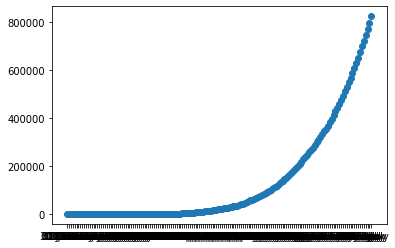

In [93]:
import pandas as pd
data = pd.read_csv('Cases_TimeSeries.csv')
plt.scatter(data['Date'], data['Total_Confirmed'])

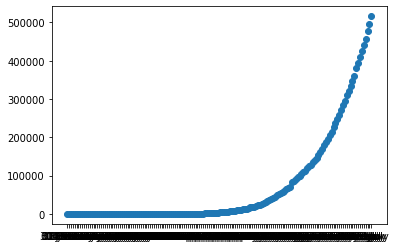

In [94]:
plt.scatter(data['Date'], data['Total_Recovered'])

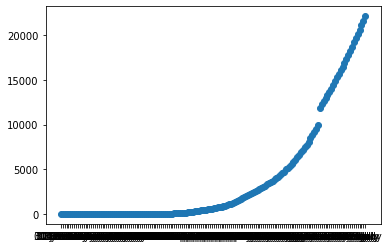

In [95]:
plt.scatter(data['Date'], data['Total_Deceased'])

## Predicting using SIR model 

source of data initial values - https://news.google.com/covid19/map?hl=en-IN&gl=IN&ceid=IN%3Aen&mid=%2Fm%2F03rk0


source of beta&gamma values - 
beta - https://www.news18.com/news/india/indias-covid-19-transmission-number-rises-for-1st-time-since-march-spurred-by-spread-in-southern-states-study-2707857.html 

gamma - https://github.com/csdegraaf/CoronaVirusModel/blob/master/corona_spread.py


In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
N = 1352642280 #total population
I0, R0 = 283468, 537508 #Active cases, Recovered cases as of July 11th
S0 = N - (I0 + R0)
beta, gamma = 1.19, 1./10 
t = np.linspace(0, 160, 160) #Number of days

In [5]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [6]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

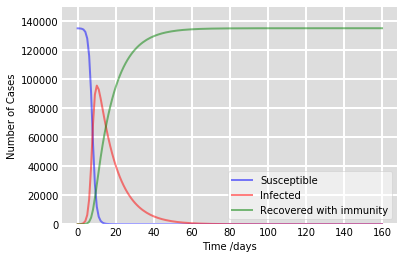

<Figure size 2880x2880 with 0 Axes>

In [7]:
fig = plt.figure(facecolor='w')
plt.figure(figsize =(40,40))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/25000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/25000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/25000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of Cases')
ax.set_ylim(0,150000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()